# Correlation Analysis in Python!

## Introduction

The term *correlation* refers to the extent to which two variables have a linear relationship with one another. Correlations are useful in data science because they can indicate possible predictive or causal relationships that can be beneficially exploited.

The Pearson correlation is +1.0 in the case of a perfect, direct (increasing) linear relationship (correlation), −1.0 in the case of a perfect, inverse (decreasing) linear relationship, and some value in the open interval (−1, 1) in all other cases, with the specific value indicating the degree of linear dependence between the variables. As the correlation coefficient approaches zero there is less of a linear relationship between the variables. The closer the correlation coefficient is to either −1.0 or +1.0, the stronger the linear relationship between the variables.

The image below shows several sets of *(x, y)* data points, along with the Pearson correlation coefficient for the relationship between the variables *x* and *y* for each set. Note that the correlation reflects the noisiness and direction of a linear relationship (top row), but not the slope of that relationship (middle), nor many aspects of nonlinear relationships (bottom). The figure in the center has a slope of 0, but in that particular case the correlation coefficient is undefined because the variance of Y is zero.

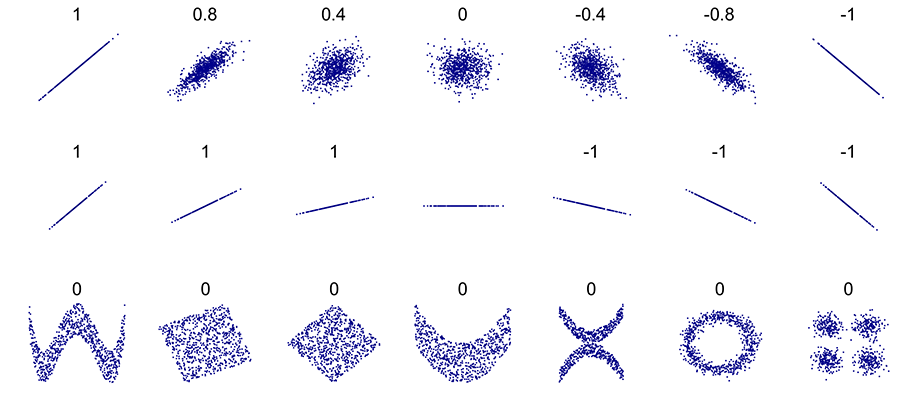

## Preparing Data for a Correlation Analysis

Before we can perform a correlation analysis, our data must be properly prepared. For example, if our dataset contains any categorical features that we would like to include in the correlation analysis, then those categorical features will need to be recoded into one or more dummy variables prior to the analysis.

Let's load and prepare our data. For our purposes, we will rely on the Galton Families dataset:

In [1]:
#import the pandas library
import pandas as pd

#import the stats library
from scipy import stats

#import statsmodels library
import statsmodels.api as sm

#get the Galton Families dataset and assign it to a pandas dataframe
df = sm.datasets.get_rdataset('GaltonFamilies', package='HistData').data

#view the first 10 rows of data in the dataframe
df.head(10)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


family  father  mother  midparentHeight  children  childNum  gender  \
0    001    78.5    67.0            75.43         4         1    male   
1    001    78.5    67.0            75.43         4         2  female   
2    001    78.5    67.0            75.43         4         3  female   
3    001    78.5    67.0            75.43         4         4  female   
4    002    75.5    66.5            73.66         4         1    male   
5    002    75.5    66.5            73.66         4         2    male   
6    002    75.5    66.5            73.66         4         3  female   
7    002    75.5    66.5            73.66         4         4  female   
8    003    75.0    64.0            72.06         2         1    male   
9    003    75.0    64.0            72.06         2         2  female   

   childHeight  
0         73.2  
1         69.2  
2         69.0  
3         69.0  
4         73.5  
5         72.5  
6         65.5  
7         65.5  
8         71.0  
9         68.0

As we can see, the dataset contains a categorical variable named **gender** whose values are the textual labels *male* and *female*. We will need to convert these textual labels into a binary dummy variable if we want to include gender in our correlation analysis:

In [2]:
#define a dictionary that specifies current and replacement values
genderCodes = {'male': 1, 'female': 0}

#use the dictionary to replace the current textual gender labels with a 0 or 1
df['gender'].replace(genderCodes, inplace=True)

#view the first 10 rows of data in the dataframe
df.head(10)

family  father  mother  midparentHeight  children  childNum  gender  \
0    001    78.5    67.0            75.43         4         1       1   
1    001    78.5    67.0            75.43         4         2       0   
2    001    78.5    67.0            75.43         4         3       0   
3    001    78.5    67.0            75.43         4         4       0   
4    002    75.5    66.5            73.66         4         1       1   
5    002    75.5    66.5            73.66         4         2       1   
6    002    75.5    66.5            73.66         4         3       0   
7    002    75.5    66.5            73.66         4         4       0   
8    003    75.0    64.0            72.06         2         1       1   
9    003    75.0    64.0            72.06         2         2       0   

   childHeight  
0         73.2  
1         69.2  
2         69.0  
3         69.0  
4         73.5  
5         72.5  
6         65.5  
7         65.5  
8         71.0  
9         68.0

The previous *male* and *female* textual labels have been replaced with the values 1 and 0, respectively. We may now proceed with our correlation analysis.

## Performing a Correlation Analysis

Since we loaded our data into a pandas DataFrame, the easiest way to view the correlations among the numeric variables in the dataset is simply to use the *corr()* function:

In [3]:
#display a correlation matrix for all of the numeric features
df.corr()

father    mother  midparentHeight  children  childNum  \
father           1.000000  0.060366         0.728439 -0.151333 -0.087446   
mother           0.060366  1.000000         0.727834 -0.033582 -0.019405   
midparentHeight  0.728439  0.727834         1.000000 -0.127016 -0.073395   
children        -0.151333 -0.033582        -0.127016  1.000000  0.577838   
childNum        -0.087446 -0.019405        -0.073395  0.577838  1.000000   
gender          -0.024762 -0.025216        -0.034319 -0.061576 -0.579744   
childHeight      0.266039  0.201322         0.320950 -0.126720 -0.625026   

                   gender  childHeight  
father          -0.024762     0.266039  
mother          -0.025216     0.201322  
midparentHeight -0.034319     0.320950  
children        -0.061576    -0.126720  
childNum        -0.579744    -0.625026  
gender           1.000000     0.716709  
childHeight      0.716709     1.000000

The famous statistician Jacob Cohen suggested the following guidelines for interpreting the (absolute) magnitude of a correlation coefficient:  

|       | Correlaton           | Meaning  |
| ------------- |:-------------:|-----|
| 1  | 0.0 - 0.1 | Negligible (very weak) |
|2   | 0.1 - 0.3      |   Small (weak) |
| 3 | 0.3 - 0.5      |   Medium (moderate) |
| 4 |  0.5 +      |  Large (strong) |

If we consider our correlation matrix in light of Cohen's guidelines, we can see that the strength of the linear relationships among the variable in our dataset ranges from negligible to large.

## Preliminary Interpretations

Since the original purpose of the Galton Families dataset was to gain insights into the relationships between a child's height and the heights of the child's parents (the *father*, *mother*, and *midparentHeight* variables), the child's gender, the number of children in a family (the *children* variable), and the order in which children were born (the *childNum* variable), let's interpret our results by examining the correlations between the **childHeight** variable and the other numeric variables in the dataset:
1. A child's height is more strongly related to the father's height (r = 0.27) than the mother's height (r = 0.20), but both of these are comparatively weak relationships.
2. There is a moderately strong relationship between a child's height and the *average* of the parents' heights (r = 0.32). This suggests that the height of a child is likely to be closer to the average height of the child's parents than to the height of any one specific parent.
3. There is a small inverse relationship between a child's height and the number of children in a family (r = -0.13). This suggests than children in large families tend to be slightly shorter on average than children in small families.
4. There is a strong inverse relationship between a child's height and the order in which a child is born (r = -0.63). This suggests that children born earlier in a family tend to be substantially taller than children born later in the same family.
5. There is a very strong positive relationship between a child's height and the *gender* variable (r = 0.72). Since our gender variable is coded such that *1 = male* and *0 = female*, and given that the correlation coefficient is positive, this suggests that male children tend to be substantially taller than female children.

**Question**: Do you think there is any connection between the results in #4 and the results in #3?

## Are Our Interpretations Statistically Defensible?

A very important consideration when performing a correlation analysis is the question of whether our interpretations are statistically defensible. Put differently, is there sufficient statistical evidence to conclude that the correlations observed in our sample are also present in the population from which the sample was drawn? To answer this question, we need to consider the probabilities (*p*-values) that the magnitude and direction of our correlation coeffcients could have been observed by random chance (i.e., simply due to sampling). Unfortunately the *corr()* function does not provide us with any information about the statistical significance of the correlations, so we'll need use the *pearsonr()* function in the scipy *stats* library in order to get the *p*-values for our correlations:

In [5]:
#define a collection containing the names of the variables that we would like to correlate with childHeight
varNames = ['father', 'mother', 'midparentHeight', 'children', 'childNum', 'gender']

#for each variable of interest
for varName in varNames:
    #get the correlation and p-value
    r, p = stats.pearsonr(df['childHeight'].values, df[varName].values)
    #print the correlation and p-value for this pair of variables
    print('childHeight & ' + varName + ': r = ' + str(round(r, 2)) + ', p = ' + str(round(p, 4)) + '\n')

childHeight & father: r = 0.27, p = 0.0

childHeight & mother: r = 0.2, p = 0.0

childHeight & midparentHeight: r = 0.32, p = 0.0

childHeight & children: r = -0.13, p = 0.0001

childHeight & childNum: r = -0.63, p = 0.0

childHeight & gender: r = 0.72, p = 0.0



As we can see, all of the correlations are statistically significant at *p* < 0.001, indicating that there is only a very tiny chance that the observed magnitude and direction of our correlation coeffcients was due to random chance. We can therefore conclude that our interpretations of the correlation coefficients are statistically defensible.